In [5]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import datetime

In [ ]:
# Load Data


def prepData(datapath):
    raw = pd.read_csv(datapath)
    del raw['Lat']
    del raw['Long']
    raw= raw.replace('Mainland China','China')
    df=raw.groupby('Country/Region').sum()
    # 03/14: temporarily drop the last column
    #del df[df.columns[-1]]
    last_date = list(df.columns)[-1]

    #df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>100)]

    df['Country/Region']=df.index
    df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
    df['date']=pd.to_datetime(df.index)

    df.index.name = None
    df=df.sort_values(by=['date'])
    df.set_index('date', inplace=True)
    df.columns = [c[1] for c in df.columns]
    return df

deaths = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        active = []
        for (c,r,d) in zip(confirmed[country], recovered[country], deaths[country]):
            active.append(c-r)
        ax.bar(confirmed.index,active, color='red')
        rec = []
        for (r,d) in zip(recovered[country],deaths[country]):
            rec.append(r+d)
        #ax.bar(recovered.index,rec, color='green')
        ax.bar(deaths.index, deaths[country], color='black')
        #ax.set_yscale('log')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=14)
        fig.suptitle('COVID-19 Active Cases + Cumulative Fatalities',size=46)
        if i==0:
            ax.legend(['Active Cases','Fatalities'])


plotBars(['China','Canada','US','Italy','Singapore','Korea, South','Japan','Germany','France','Australia','United Kingdom'])

maxDate = confirmed.index[-1]
#print(maxDate)
savedir = os.path.join('data',maxDate.strftime('%Y%m%d'))
if not os.path.isdir(savedir):
    os.makedirs(savedir)
plt.savefig(os.path.join(savedir,'5_barplots.png'))

NameError: name 'df' is not defined

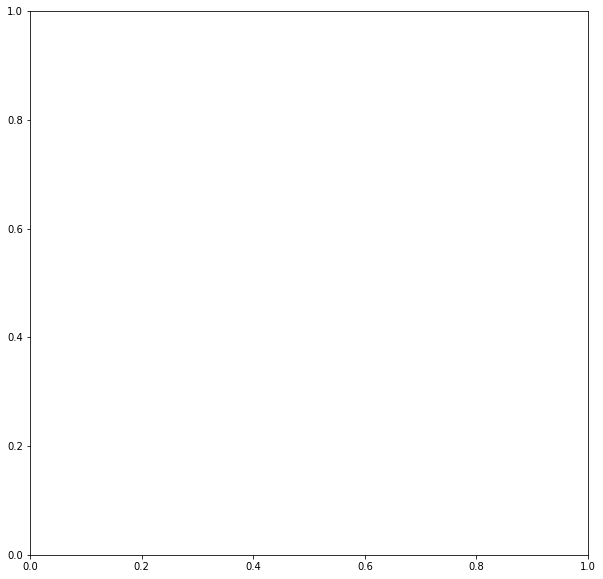

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

#del df['Cruise Ship']

fig, ax = plt.subplots()
#print(df.index[20:])
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
window=14
for c,m in zip(df.columns,markers):
    
    growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-(window-1)]),1.0/window)-1)*100 if df[c][i]>10 else float('nan') for i in range(window,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(df.index[window:], growth[c], marker=m)

font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
ax.legend(df.columns, prop=font)       
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Avg daily % growth ({} days ending X)'.format(window), size=12)
#plt.ylim((0,100))

In [ ]:
maxDate = max(df.index)
threshold = 10
for c in df.columns:
    for i,a in enumerate(df[c]):        
        if a>=threshold:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
#del df['China']
df

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
def plotdataframe(df, logy=False, legend=True):
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=2.5)
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(prop=font)

    return ax

plotdataframe(df, logy=True)